In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
from qat.core.console import display
from qat.lang.AQASM import Program, H
from qat.lang.AQASM.qftarith import QFT

In [4]:
sys.path.append('/home/gferro/qlm_notebooks/notebooks_1.5.0/Gonzalo/ProgramasDefinitivos/')

In [5]:
a = 0.
b = 1.
nqbits = 2
#_aux  = 8

In [6]:
def p(x):
    return x*x
def f(x):
    return np.sin(x)

In [7]:
from expectation_module import load_probabilities, load_function
centers, probs, P_gate = load_probabilities(nqbits, p, a, b)
R_gate, y = load_function(centers, f, nqbits)

In [32]:
from qat.lang.AQASM import AbstractGate
def Uf0(n):
    """
    Implementa una reflexion en torno al estado 0: I-2|w>|0><w|<0|
    """
    #Matriz Identidad
    Identity = np.identity(2**n)
    #Creo 2|w>|1><w|<1|
    #Matriz de ceros
    #Zeroes = np.zeros([2**n, 2**n])
    #Rellenos solo aquellos del tipo |w>|1>
    for i in range(0, 2**n, 2):
        Identity[i,i] = -1
    return Identity#-Zeroes
U0 = AbstractGate("U0", [int], matrix_generator=Uf0, arity = lambda x: x)

In [16]:
Uf0(nqbits+1)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]])

In [33]:
def Opa(n):
    """
    Implementa una reflexion en torno al estado 0: I-2|0><0|
    """
    #Matriz Identidad
    Identity = np.identity(2**n)
    Identity[0,0] = -1
    return Identity
U_0 = AbstractGate("U_0", [int], matrix_generator=Opa, arity = lambda x: x)

In [34]:
from qat.lang.AQASM import Program
qprog = Program()
qbits = qprog.qalloc(nqbits+1)
#Cargo Probabilidad
qprog.apply(P_gate, qbits[:-1])
#Cargo funcion a integrar
qprog.apply(R_gate, qbits)

#Reflexion 
qprog.apply(U0(nqbits+1), qbits)

#Reflexion en torno a |Phi>
qprog.apply(R_gate.dag(),qbits)
qprog.apply(P_gate.dag(),qbits[:-1])

qprog.apply(U_0(nqbits+1), qbits)

qprog.apply(P_gate,qbits[:-1])
qprog.apply(R_gate,qbits)


In [19]:
#Reflexion en torno a |Phi>
qprog.apply(R_gate.dag(),qbits)
qprog.apply(P_gate.dag(),qbits[:-1])

qprog.apply(U_0(nqbits+1), qbits)

qprog.apply(P_gate,qbits[:-1])
qprog.apply(R_gate,qbits)

In [35]:
circuit = qprog.to_circ()

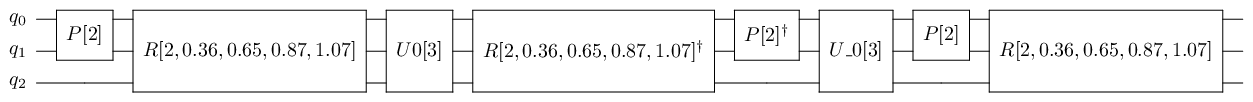

In [36]:
%qatdisplay circuit

In [37]:
from qat.qpus import get_default_qpu
Algebra = get_default_qpu()

In [39]:
result = Algebra.submit(circuit.to_job())

In [40]:
states, probabilities, amplitudes = [], [], []
for res in result:
    states.append(res.state) # Store the decimal number that represents each state
    probabilities.append(res.probability) # Store its probability
    amplitudes.append(res.amplitude)
    print("Aux qbits have value %s (the probability of getting this result is %s)"%(
        res.state, res.amplitude))

Aux qbits have value |000> (the probability of getting this result is (-0.16847353341753765+0j))
Aux qbits have value |001> (the probability of getting this result is (0.013468938581582851+0j))
Aux qbits have value |010> (the probability of getting this result is (-0.4300505164266705+0j))
Aux qbits have value |011> (the probability of getting this result is (0.06925762217131468+0j))
Aux qbits have value |100> (the probability of getting this result is (-0.5799493968766805+0j))
Aux qbits have value |101> (the probability of getting this result is (0.14589089539783578+0j))
Aux qbits have value |110> (the probability of getting this result is (-0.6077372233423123+0j))
Aux qbits have value |111> (the probability of getting this result is (0.23393418388553983+0j))


In [ ]:
[amplitudes[i] for i in range(1, len(probabilities), 2)]

In [ ]:
[states[i] for i in range(1, len(probabilities), 2)]

In [ ]:
Zeroes

In [ ]:
Zeroes[[[i,i] for i in range(0, 2**n, 2)], ] = -2

In [ ]:
a= [[i,i] for i in range(0, 2**n, 2)]

In [ ]:
a

In [ ]:
Zeroes[a] = -1

In [ ]:
    [for i in ]
    Identity[state, state] =-1
    if Positive:
        return Identity
    else:
        return -Identity
#Creo una puerta utilizando el circuito    
Reflexion_Gate = AbstractGate(
    "Reflexion", 
    [int, int, bool], 
    matrix_generator=Reflection,
    arity = lambda x, y, z: x
)

In [ ]:
from qat.lang.AQASM import Program, RY, CNOT, AbstractGate, QRoutine, Z, X
def load_U0(nqbits):
	"""
	Creates the gate U0, whose action is to flip the sign of the marked states.
	Marked states are those in which the auxiliary qubit has value 1, so this is achieved with a Z gate
	acting on that qubit. This function is more or less unnecessary.
	
	ARGUMENTS:
	nqbits (int) : number of qubits without including the auxiliary one
	
	RETURNS:
	U0_gate (ParamGate)
	"""
	U0 = AbstractGate("U0", [int])
	def U0_generator(nqbits):
		rout = QRoutine()
		reg = rout.new_wires(nqbits+1)
		rout.apply(Z, reg[-1])
		return rout
	U0.set_circuit_generator(U0_generator)
	U0_gate = U0(nqbits)
	return U0_gate

def load_U1(nqbits, P_gate, R_gate):
	"""
	Function that creates the gate which performs the operation of flipping the sign of the component along psi
	
	ARGUMENTS:
	nqbits (int) : number of qubits
	R_gate (ParamGate) : Gate that implements the operator R
	P_gate (ParamGate) : Gate that implements the operator P
	
	RETURNS:
	U1_gate (ParamGate)
	"""
	U1 = AbstractGate("U1", [int])
	def U1_generator(nqbits):
		rout = QRoutine()
		reg = rout.new_wires(nqbits+1)
		rout.apply(R_gate.dag(), reg)
		rout.apply(P_gate.dag(), reg[:-1])
		for wire in reg:
			rout.apply(X, wire)
		rout.apply(H, reg[-1])
		s = 'X' + '.ctrl()'*nqbits
		rout.apply(eval(s), reg)
		rout.apply(H, reg[-1])
		for wire in reg:
			rout.apply(X, wire)
		rout.apply(P_gate, reg[:-1])
		rout.apply(R_gate, reg)
		return rout
	U1.set_circuit_generator(U1_generator)
	U1_gate = U1(nqbits)
	return U1_gate

def load_Q(nqbits, P_gate, R_gate):
	"""
	Creates the Grover operator Q except a global phase, so it really creates the gate -Q
	
	ARGUMENTS:
	nqbits  (int)       : number of qubits
	U0_gate (ParamGate) : Gate U_psi_0
	U1_gate (ParamGate) : Gate U_psi
	
	RETURNS:
	Q_gate (ParamGate)  : Gate -Q=U1U0
	"""
	U0_gate = load_U0(nqbits)
	U1_gate = load_U1(nqbits, P_gate, R_gate)
	Q = AbstractGate("Q", [int])
	def Q_generator(nqbits):
		rout = QRoutine()
		reg  = rout.new_wires(nqbits+1)
		rout.apply(U0_gate, reg)
		rout.apply(U1_gate, reg)
		return rout
	Q.set_circuit_generator(Q_generator)
	Q_gate = Q(nqbits)
	return Q_gate, U0_gate, U1_gate


In [ ]:
from qat.lang.AQASM import Program, RY, CNOT, AbstractGate, QRoutine, Z, X

In [ ]:
Q_gate, U0_gate, U1_gate  = load_Q(nqbits, P_gate, R_gate)

In [ ]:
qprog = Program()
qbits = qprog.qalloc(nqbits+1)
qprog.apply(P_gate, qbits[:-1])
qprog.apply(R_gate, qbits)
q_aux = qprog.qalloc(n_aux)
for i, aux in enumerate(q_aux):
    qprog.apply(H, aux)
    # Apply Q**(2**i) controlled by the auxiliary register
    for _ in range(2**(i)):
        qprog.apply(Q_gate.ctrl(), aux, qbits)
qprog.apply(QFT(n_aux).dag(), q_aux)        

In [ ]:
circuit = qprog.to_circ()

In [ ]:
%qatdisplay circuit

In [ ]:
from qat.qpus import get_default_qpu

In [ ]:
Algebra = get_default_qpu()

In [ ]:
result = Algebra.submit(circuit.to_job())

In [ ]:
result = Algebra.submit(circuit.to_job(qubits = [i+nqbits+1 for i in range(n_aux)])) 

In [ ]:
states, probabilities = [], []
for res in result:
    states.append(res.state.int) # Store the decimal number that represents each state
    probabilities.append(res.probability) # Store its probability
    print("Aux qbits have value %s (the probability of getting this result is %s)"%(res.state, res.probability))

In [ ]:
# Histogram those values
plt.figure(figsize=(12, 6))
plt.bar(states, probabilities)
plt.xlabel('Measured value')
plt.ylabel('Probability')
plt.tight_layout()
plt.savefig('ProbDistribution.png')


In [ ]:
# Take the maximum probability
i_max = np.argsort(probabilities)[-1]

In [ ]:
from scipy.integrate import quad

In [ ]:
# Compute phi for the measured value with its upper and lower limits
phis = (np.pi/(2.**n_aux))*np.array([states[i_max], states[i_max]+0.5, states[i_max]-0.5]) #+0.5 and -0.5 are the most extreme values that we could have for M if it was not an int

I = np.cos(phis)**2. #Remember that the integral is codified in the amplitudes of \ket{\psi_1}

print(u'Obtained value of the integral %f' % (I[0]))
print(u'Upper and lower bonds', I[1], I[2])


Integral = np.sum(probs*y)
print(u'Discretized value of the integral:', Integral)

def g(x):
	return f(x)*p(x)/(quad(p, a, b)[0])
print(u'Exact value of the integral:', quad(g, a, b))


In [ ]:
def U1_generator(nqbits):
		rout = QRoutine()
		reg = rout.new_wires(nqbits+1)
		rout.apply(R_gate.dag(), reg)
		rout.apply(P_gate.dag(), reg[:-1])
		for wire in reg:
			rout.apply(X, wire)
		rout.apply(H, reg[-1])
		s = 'X' + '.ctrl()'*nqbits
		rout.apply(eval(s), reg)
		rout.apply(H, reg[-1])
		for wire in reg:
			rout.apply(X, wire)
		rout.apply(P_gate, reg[:-1])
		rout.apply(R_gate, reg)
		return rout